In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import sympy as sp
import scipy

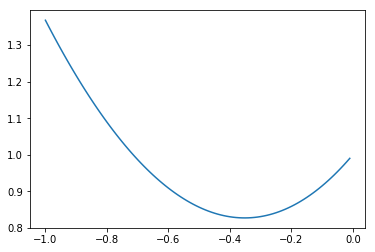

In [2]:
def f(x):
    return math.e**x + x**2

plt.plot([x for x in np.arange(-1, 0, 0.01)], [f(x) for x in np.arange(-1, 0, 0.01)])

In [3]:
x_sym = sp.Symbol('x', real=True)
y_sym = sp.Symbol('y',  real=True)
f_sym = sp.exp(x_sym) + x_sym**2
f_sym.diff().diff() # экстремум - минимум

exp(x) + 2

In [4]:
f2_Sym = sp.Eq(y_sym, f_sym)

In [22]:
import scipy.optimize as sco
X_min = sco.root(df, 0).get('x')[0]
X_min

0.8603335890193798

In [6]:
def dihotomia(f, a, b, eps):
    e = eps*0.1
    while abs(b-a)>=eps:
        x = (a+b)/2
        x1 = x-e
        x2 = x+e
        F1 = f(x1)
        F2 = f(x2)
        if F1<F2:
            b = x2
        else:
            a = x1
    return [(a+b)/2, f((a+b)/2)]

In [23]:
dihotomia(f, -1, 0, 0.001)

[-0.8605235839843749, -0.1122192601395561]

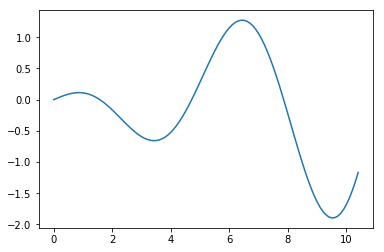

In [30]:
a, b = 0,3*math.pi+1

def f(x):
    return math.cos(x)*x/5

def df(x):
    return -(x*math.sin(x)/5) + math.cos(x)/5

def ddf(x):
    return -(x*math.cos(x)/5) - 2*math.cos(x)/5

plt.plot([x for x in np.arange(a,b,0.1)], [f(x) for x in np.arange(a,b, 0.1)])

In [31]:
def scan(a,b,f,step):
    d = []
    for x in np.arange(a, b+step, step):
        d.append([x, f(x)])
    return d


In [32]:
sorted(scan(a,b,f, 0.01), key=lambda x: x[1])[0]

[9.53, -1.8954584227697442]

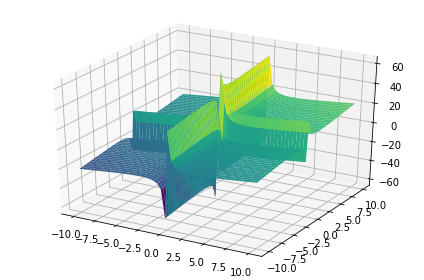

In [179]:
x1 = sp.Symbol('x1')
x2 = sp.Symbol('x2')
f_sym2 = 4/x1 + 9/x2 + x1 + x2


sp.plotting.plot3d(f_sym2)

In [180]:
def f2(x):
    x1 = x[0]
    x2 = x[1]
    return 4/x1 + 9/x2 + x1 + x2

def constr1(x):
    x1 = x[0]
    x2 = x[1]
    return x1 + x2 - 6

from scipy.optimize import Bounds
bounds = Bounds ([0, 0], [np.inf, np.inf])

from scipy.optimize import LinearConstraint
constraint = LinearConstraint([1,1], [-np.inf], [6])

In [165]:
from scipy.optimize import minimize

x0 = [1,1]

sol = minimize(f2, x0, method='trust-constr', constraints=constraint, bounds=bounds)
sol

 barrier_parameter: 1.0240000000000006e-08
 barrier_tolerance: 1.0240000000000006e-08
          cg_niter: 25
      cg_stop_cond: 0
            constr: [array([4.99999997]), array([2.        , 2.99999998])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.07299518585205078
               fun: 10.0
              grad: array([0., 0.])
               jac: [array([[1, 1]]), array([[1., 0.],
       [0., 1.]])]
   lagrangian_grad: array([1.06192591e-09, 2.73066663e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 51
              nhev: 0
               nit: 27
             niter: 27
              njev: 0
        optimality: 2.730666631027174e-09
            status: 1
           success: True
         tr_radius: 42133520.33016732
                 v: [array([6.4474074e-09]), array([-5.38548149e-09, -3.71674076e-09]

In [184]:
sol = minimize(f2, x0)
sol

      fun: 10.000000000066295
 hess_inv: array([[ 0.98060687, -0.05048385],
       [-0.05048385,  1.3637647 ]])
      jac: array([4.76837158e-06, 8.58306885e-06])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([2.00000473, 3.00001286])

In [26]:
from scipy.optimize import minimize
def func(x):
    return 4/x[0]+ 9/x[1] + x[0] + x[1]
    
h_1 = lambda x: (x[0] + x[1] - 6)
h_2 = lambda x: (x[0])
h_3 = lambda x: (x[1])

def R1(x):
    return 0 if x[0] + x[1] <= 6 else 1

def R2(x):
    return 0 if x[0] >= 0 else 1

def R3(x):
    return 0 if x[1] >= 0 else 1

def alpha(x):
    return R1(x) + R2(x) + R3(x)

r, b = 1, 1.1
x_c = [3.1, 3]
eps = 0.0001
for i in range(100):
    if r*alpha(x_c) < eps:
        break
    def c_f(x):
        return func(x) + r*alpha(x)
    x_c = minimize(c_f, x_c).x
    r*=b
print(x_c, func(x_c))

[2.00000437 3.        ] 10.000000000009543


In [27]:
def func(X, Y):
    return 4/X + 9/Y + X + Y


def dx(x):
    return 1 - 4/x**2


def dy(y):
    return 1 - 4/y**2

def grad(previous_x, previous_y, iters, step_size):
    for i in range(iters):
        current_x = previous_x - step_size * dx(previous_x)
        current_y = previous_y - step_size * dy(previous_y)
        previous_x = current_x
        previous_y = current_y
        #print("Step:", i, "CurX:", current_x, "CurY:", current_y, "Fun:", func(current_x, current_y))
    return [current_x, current_y, func(current_x, current_y)]

grad(3,3,100, 1)

[2.0, 2.0, 10.5]